### Image Features


*An object in an image has n number of features, which help us in identifying the object. Here, we'll find those n different features of the image, and group them into a vector of feature of that particular object. And this vector will help us find the similar object in another image.*

**ORB** Algorithm is used for creating a feature vector of an image. ORB refers to Oriented FAST and Rotated BRIEF algorithm. It is a fusion of FAST keypoint detector and BRIEF descriptor.

**ORB Agorithm**

   - Find the keypoints in an image, using FAST Algorithm(Features from Accelerated Segments Test) we find keypoints. FAST quickly compares the brightness levels in a given pixel area, and if the threshold of brightness or darkness is exceeded by the neighbouring pixel, then such point is termed as **Keypoint**. The keypoints give us the location of the object defining the edges in an image.
    
   - Next, ORB uses BRIEF algorithm to convert these keypoints into feature vector, which helps in identifying the object in the image.
    
   - BRIEF(Binary Robust Independent Elementary Features), it creates binary feature vector from the keypoints. Since the feature vectors are 1's and 0's, it can be stored efficiently and computed quickly.
    
   - BRIEF creates binary descriptors for the keypoints, it first smoothens the given image with gaussian kernel to prevent the descriptor from being too sensitive to high frequency noise.
   
   - ORB is replacement for earlier algorithms like SIFT, SURF etc for feature detection.
        
[ORB](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_brief/py_brief.html)

In [1]:
import copy
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Create Image Pyramids

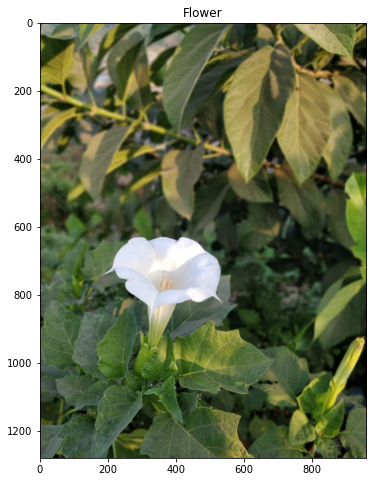

In [2]:
# Read in the image
image = cv2.imread('../Images/flower.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.title("Flower")
plt.imshow(image)

**Downsampled Version Of the Image**

(0.0, 1280.0)

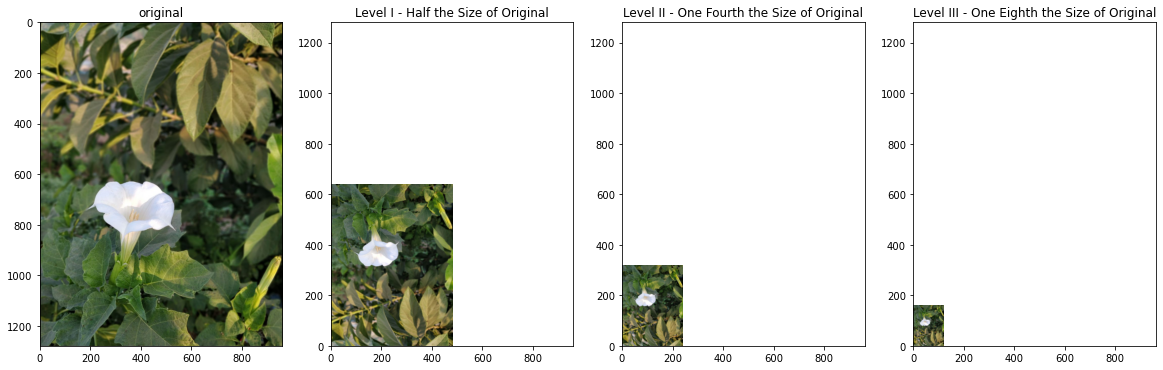

In [3]:
level_1 = cv2.pyrDown(image)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)

# Display the images
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image)

ax2.set_title('Level I - Half the Size of Original')
ax2.imshow(level_1)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([0, image.shape[0]])

ax3.set_title('Level II - One Fourth the Size of Original')
ax3.imshow(level_2)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([0, image.shape[0]])

ax4.set_title('Level III - One Eighth the Size of Original')
ax4.imshow(level_3)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([0, image.shape[0]])

### Find keypoints using ORB

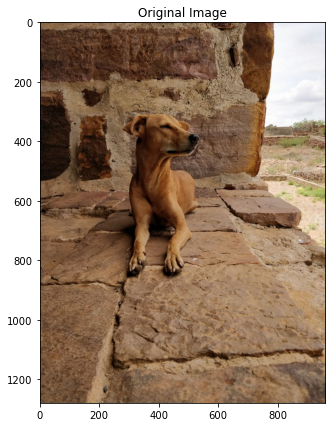

In [4]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [14, 7]

# Load the training image
image = cv2.imread("../Images/dog.jpg")

# Convert the training image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray Scale
training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(training_image)
# plt.subplot(122)
# plt.title('Gray Scale Image')
# plt.imshow(training_gray, cmap = 'gray')
# plt.show()

**Keypoint Detection Based On FAST Algorithm**

FAST algorithm identifies keypoints by looking at the neighboring pixels, where the intensity of the pixel brightness above a certain threshold leads to keypoint.

To detect feature of an image irrespective of its scale, ORB uses multiscale image pyramid. We've seen in flower image, where we create different scaled images. ORB performs multiscale pyramid and then detects keypoints on each scale variant of the image, resulting in a smaller and a larger circle around a keypoint.

[More Details On ORB](https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf)

In [5]:
# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("Keypoints Drawn")

Keypoints Drawn


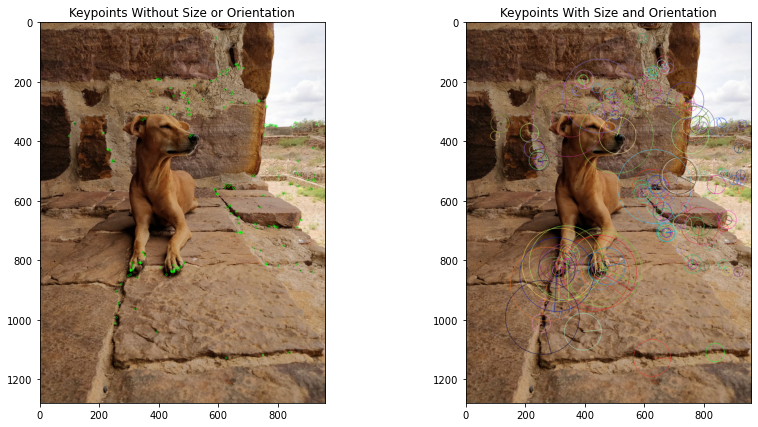


Number of keypoints Detected:  188


In [6]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

### Scale Invariance Property Of ORB

It means that it is able to detect objects in images regardless of their size. To see this, we will now use Brute-Force matcher to match points between the training image and a query image that is a ¼ the size of the original training image.

In [7]:
#Take a look at how downsampling with image pyramids works.

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('../Images/dog.jpg')

# Load the query image
image2 = cv2.imread('../Images/dog.jpg')
level_1 = cv2.pyrDown(image2)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(level_2, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

In [8]:
"""
Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
the pyramid decimation ratio
"""
orb = cv2.ORB_create(1000, 2.0)

"""
Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
The None parameter is needed to indicate that we are not using a mask in either case.
"""
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

"""
Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
"""
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

"""Perform the matching between the ORB descriptors of the training image and the query image"""
matches = bf.match(descriptors_train, descriptors_query)

"""The matches with shorter distance are the ones we want. So, we sort the matches according to distance"""
matches = sorted(matches, key = lambda x : x.distance)

"""
Connect the keypoints in the training image with their best matching keypoints in the query image.
The best matches correspond to the first elements in the sorted matches list, since they are the ones
with the shorter distance. We draw the first 30 mathces and use flags = 2 to plot the matching keypoints
without size or orientation.
"""
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:30], query_gray, flags = 2)

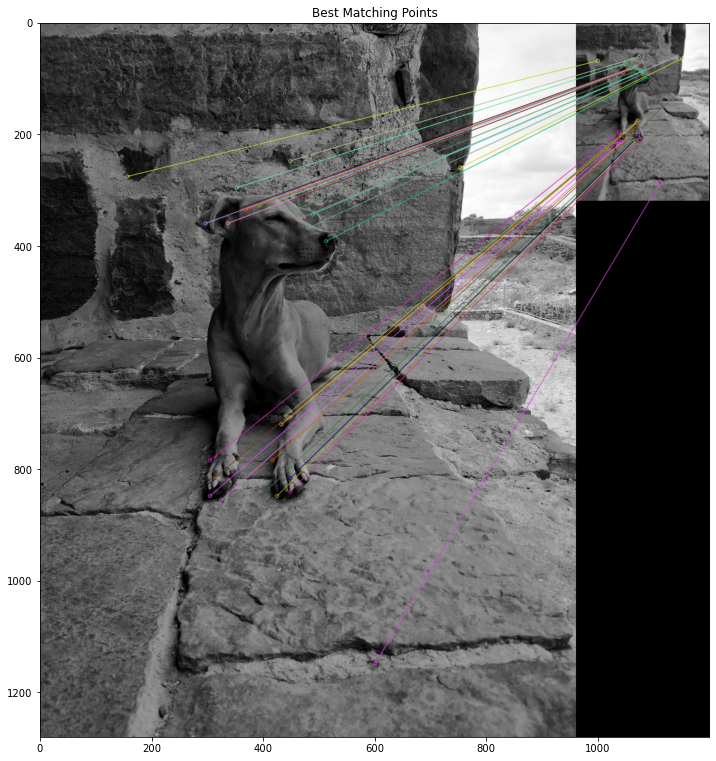


The Training Image has shape: (1280, 960)
The Query Image has shape: (320, 240)

Number of Keypoints Detected In The Training Image:  941
Number of Keypoints Detected In The Query Image:  629

Number of Matching Keypoints Between The Training and Query Images:  286


In [9]:
# Display the best matching points
plt.figure(figsize=(12, 16))
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the shape of the training image
print('\nThe Training Image has shape:', training_gray.shape)

#Print the shape of the query image
print('The Query Image has shape:', query_gray.shape)

# Print the number of keypoints detected in the training image
print("\nNumber of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

**As shown above, how ORB is able to detect the keypoints and match it across the original and scaled down image. We can also do the same even the image is rotated or illuminated or noise is added to it.**

**Note: Practical application of this algorithm can be found for matching the faces and tagging it.**

[Udacity's Feature Detector ORB](https://github.com/udacity/CVND_Exercises/blob/master/1_4_Feature_Vectors/2.%20ORB.ipynb)